In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')


In [3]:
data1 = pd.read_csv('data_182.csv', delimiter=';')
data2 = data1[data1['letter_code']=="USD"]
data = data2[data2['date']>"1998-09-28"]

In [4]:
data


,date,currency,digital_code,letter_code,rate
86586,1998-09-29,Доллар США,840.0,USD,15.9932
86612,1998-09-30,Доллар США,840.0,USD,16.0645
86646,1998-10-01,Доллар США,840.0,USD,15.9056
86688,1998-10-02,Доллар США,840.0,USD,15.9923
86714,1998-10-03,Доллар США,840.0,USD,15.9706
...,...,...,...,...,...
321358,2021-10-28,Доллар США,840.0,USD,69.8104
321392,2021-10-29,Доллар США,840.0,USD,70.5207
321426,2021-10-30,Доллар США,840.0,USD,70.5200
321460,2021-10-31,Доллар США,840.0,USD,70.5200


## Общая информация о данных

In [5]:
data.shape

(8435, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435 entries, 86586 to 321494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          8435 non-null   object 
 1   currency      8435 non-null   object 
 2   digital_code  8435 non-null   float64
 3   letter_code   8435 non-null   object 
 4   rate          8435 non-null   float64
dtypes: float64(2), object(3)
memory usage: 395.4+ KB


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,8435,8435,1998-09-29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,8435,1,Доллар США,8435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digital_code,8435.0,NaN,NaN,NaN,840.0,0.0,840.0,840.0,840.0,840.0,840.0
letter_code,8435,1,USD,8435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,8435.0,NaN,NaN,NaN,39.992872,17.237351,13.0,28.32,30.863,58.0851,83.5913


In [8]:
data['rate'].describe()

count    8435.000000
mean       39.992872
std        17.237351
min        13.000000
25%        28.320000
50%        30.863000
75%        58.085100
max        83.591300
Name: rate, dtype: float64

## Анализ количественной информации

<AxesSubplot: >

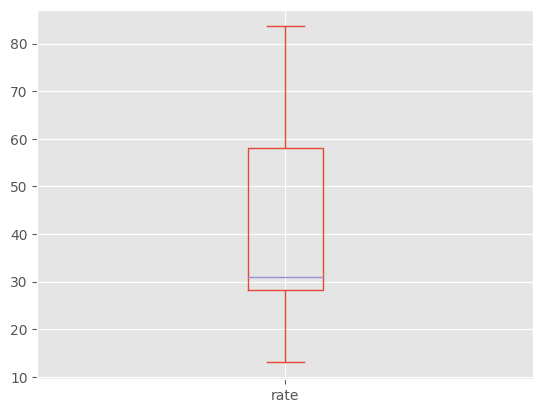

In [42]:
data['rate'].plot(kind='box')

In [43]:
IQR = np.quantile(data['rate'],0.75) - np.quantile(data['rate'],0.25)

In [44]:
IQR

29.765099999999997

In [45]:
np.quantile(data['rate'],0.75),np.quantile(data['rate'],0.25)

(58.0851, 28.32)

In [46]:
np.quantile(data['rate'], 0.5) == data['rate'].median(), np.quantile(data['rate'], 0.5)

(True, 30.863)

In [47]:
data['rate'].min(),data['rate'].max()

(13.0, 83.5913)

In [48]:
data['rate'].plot

<AxesSubplot: >

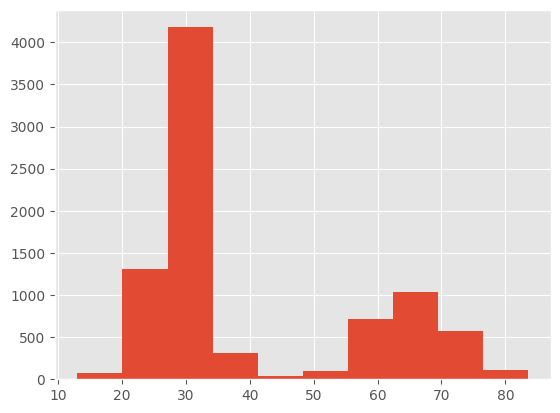

In [49]:
data['rate'].hist()

<AxesSubplot: ylabel='Density'>

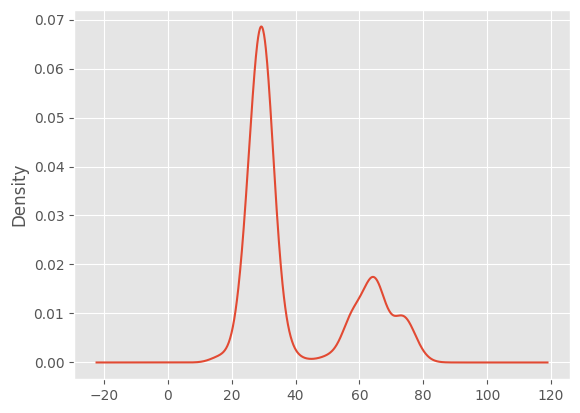

In [9]:
data['rate'].plot(kind ='kde')

<AxesSubplot: ylabel='rate'>

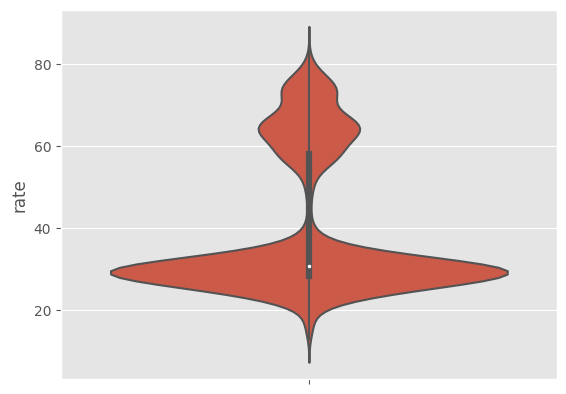

In [51]:
sns.violinplot(y = 'rate', data= data )

## Анализ категориальной информации

In [ ]:
## количество данных о разных валютах

<AxesSubplot: xlabel='letter_code', ylabel='count'>

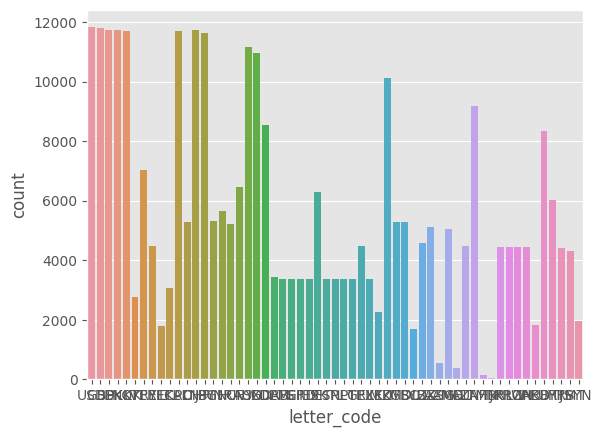

In [23]:
sns.countplot(x = 'letter_code', data = data1 )

In [17]:
data1['Y'] = (data1['rate'])  > 50.0

In [19]:
data1

,date,currency,digital_code,letter_code,rate,Y
0,1924-01-01,Доллар США,840.0,USD,2.200000,False
1,1924-01-01,Фунт стерлингов Соединенного королевства,826.0,GBP,9.400000,False
2,1924-01-01,Шведская крона,752.0,SEK,0.550000,False
3,1924-02-01,Доллар США,840.0,USD,2.170000,False
4,1924-02-01,Фунт стерлингов Соединенного королевства,826.0,GBP,9.240000,False
...,...,...,...,...,...,...
321513,2021-11-01,Чешская крона,203.0,CZK,3.205160,False
321514,2021-11-01,Шведская крона,752.0,SEK,8.275440,False
321515,2021-11-01,Швейцарский франк,756.0,CHF,77.341500,True
321516,2021-11-01,Южноафриканский рэнд,710.0,ZAR,4.617300,False


## Сравнение распределений признаков для разных классов

<AxesSubplot: xlabel='Y', ylabel='rate'>

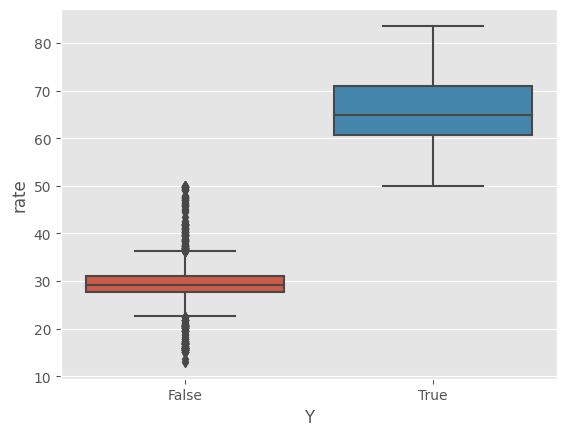

In [27]:
sns.boxplot(x ='Y', y = 'rate', data = data)

## Анализ зависимости двух непрерывных переменных

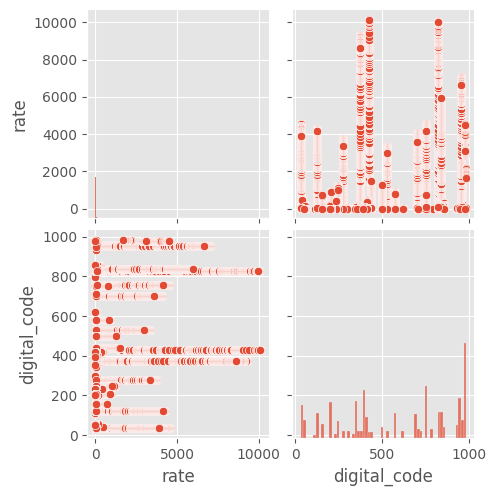

In [28]:
sns.pairplot(data1[['rate',
       'letter_code',
       'digital_code', 'currency']])

<AxesSubplot: xlabel='letter_code', ylabel='rate'>

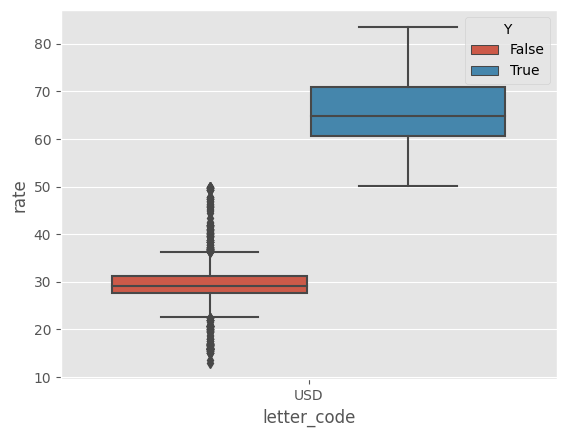

In [36]:
sns.boxplot(x= 'letter_code', y='rate',hue='Y',data = data)